# TP2 : Bike Rental

We have been contacted to build a predictive model to help Bike Rental companies in
predicting the hourly and daily demand on bikes.

The objective of this mini-project is to build a predictive model by implementing
gradient descent for linear regression, compare our model to models obtained by
Normal equation and scikit learn’s. Then, we will improve the model by doing feature
engineering.

In [1]:
import pandas as pd
import numpy as np
import sklearn as skt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Bike Rental UCI dataset.csv')

## Dataset understanding :

In [3]:
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


In [4]:
df.shape

(17379, 13)

In [5]:
df.describe() #il n'y a pas dayOfWeek car ce n'est pas un int

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,days,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,361.562576,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,209.042828,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,181.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,362.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,543.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,724.000000,977.000000


As we can see, our data is complete (count is the same for all variables), so we can begin our analyses.

## Data Visualization

Text(0.5, 1.0, 'Number of rented bikes in function of time ')

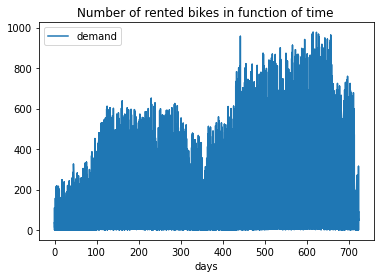

In [6]:
df.plot(x='days', y='demand')
plt.title('Number of rented bikes in function of time ')

We can notice that number of demand on bikes increase quickly since the 1st day. However, at certain times of the year there are sharp drops.


Text(0.5, 1.0, 'Number of demand of bikes in function of month ')

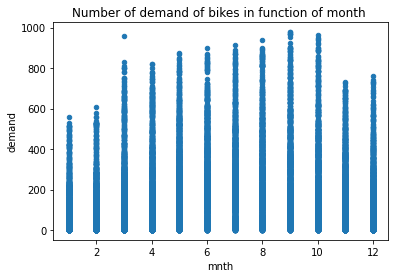

In [7]:
df.plot(kind = 'scatter',x='mnth', y='demand')
plt.title('Number of demand of bikes in function of month ')

We can see on this visualisation that in summer : june until october, the demand for bikes is the highest ( what is normal because it is more pleasant to cycle when the weather is nice). However in winter the demand decreases.

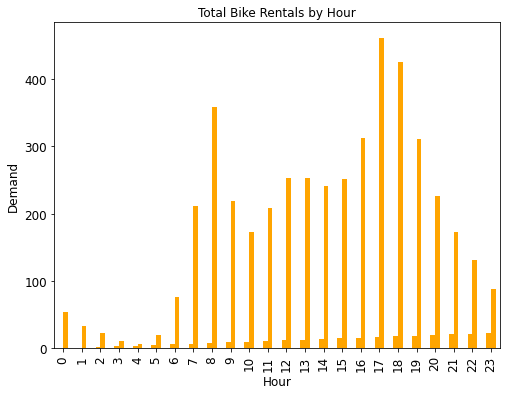

In [9]:
axe = df[['hr','demand']].groupby(['hr']).mean().reset_index().plot(kind='bar', figsize=(8, 6),
legend = False, title ="Total Bike Rentals by Hour", color='orange', fontsize=12) 
axe.set_xlabel("Hour", fontsize=12)
axe.set_ylabel("Demand", fontsize=12)
plt.show()
#400 car c'est la moyenne par jour et non par mois 

In this diagram,we notice that during peak hours the number of requests is high and at night or in the evening there is almost no request.

Text(0.5, 1.0, 'Number of demand of bikes in function of temperature')

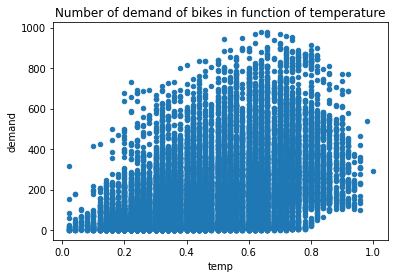

In [10]:
df.plot(kind = 'scatter',x='temp', y='demand')
plt.title('Number of demand of bikes in function of temperature')

We have normalized temperature which represents real values between -8°C and 39°C. So, when we are close to extremities, it's either too cold (close to 0) or too hot (close to 1).
That's why there is a strong use of bikes in the middle with a good weather.

Text(0.5, 1.0, 'Number of demand of bikes in function of weathersit')

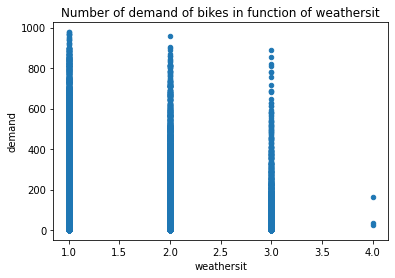

In [11]:
df.plot(kind = 'scatter',x='weathersit', y='demand')
plt.title('Number of demand of bikes in function of weathersit')

In this graphic, we notice that 1 (Clear,Few clouds) is the highest and 4 (Heavy Rain, Ice Pallets) is the lowest. So more weather is pleasant more people cycle.

Text(0.5, 1.0, 'Number of demand of bikes in function of type of day')

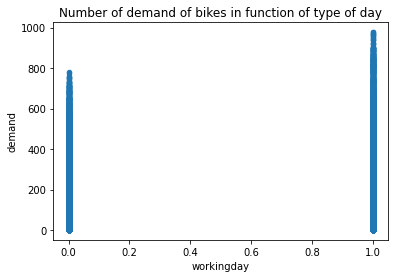

In [12]:
df.plot(kind = 'scatter',x='workingday', y='demand')
plt.title('Number of demand of bikes in function of type of day')

During working days, use of bikes is more request than during holidays or weekend.

## I) Implementation-from-scratch of linear regression with gradient descent

### NormalizeFeatures

In [13]:
X = df[['season', 'yr', 'mnth','hr','holiday', 'workingday', 'weathersit','temp','hum','windspeed','dayOfWeek','days']]
X.dayOfWeek=X.dayOfWeek.astype("category").cat.codes #conversion objet en int
y = df[['demand']]

In [14]:
# on s'assure que le dayOfWeek soit devenu un int
X.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days
0,1,0,1,0,0,0,1,0.24,0.81,0.0,2,0
1,1,0,1,1,0,0,1,0.22,0.80,0.0,2,0
2,1,0,1,2,0,0,1,0.22,0.80,0.0,2,0
3,1,0,1,3,0,0,1,0.24,0.75,0.0,2,0
4,1,0,1,4,0,0,1,0.24,0.75,0.0,2,0


In [15]:
#formule pour normaliser :
def z_score(X):
    mean = X.mean(axis = 0)
    std = X.std(axis=0)
    return (X-mean)/std

In [16]:
X_normalized = z_score(X)
X_normalized

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days
0,-1.356595,-1.005105,-1.610392,-1.669956,-0.172107,-1.466858,-0.665174,-1.334609,0.947345,-1.553844,-0.496803,-1.729610
1,-1.356595,-1.005105,-1.610392,-1.525330,-0.172107,-1.466858,-0.665174,-1.438475,0.895513,-1.553844,-0.496803,-1.729610
2,-1.356595,-1.005105,-1.610392,-1.380705,-0.172107,-1.466858,-0.665174,-1.438475,0.895513,-1.553844,-0.496803,-1.729610
3,-1.356595,-1.005105,-1.610392,-1.236079,-0.172107,-1.466858,-0.665174,-1.334609,0.636351,-1.553844,-0.496803,-1.729610
4,-1.356595,-1.005105,-1.610392,-1.091454,-0.172107,-1.466858,-0.665174,-1.334609,0.636351,-1.553844,-0.496803,-1.729610
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.356595,0.994863,1.588421,1.077931,-0.172107,0.681690,0.898898,-1.230743,-0.141133,-0.211685,-0.997322,1.729011
17375,-1.356595,0.994863,1.588421,1.222556,-0.172107,0.681690,0.898898,-1.230743,-0.141133,-0.211685,-0.997322,1.729011
17376,-1.356595,0.994863,1.588421,1.367182,-0.172107,0.681690,-0.665174,-1.230743,-0.141133,-0.211685,-0.997322,1.733795
17377,-1.356595,0.994863,1.588421,1.511807,-0.172107,0.681690,-0.665174,-1.230743,-0.348463,-0.456086,-0.997322,1.733795


In [17]:
X_one = np.append(np.ones((X_normalized.shape[0],1), dtype=float), X_normalized, axis =1)
X_one

array([[ 1.        , -1.35659527, -1.00510539, ..., -1.55384381,
        -0.49680332, -1.72961005],
       [ 1.        , -1.35659527, -1.00510539, ..., -1.55384381,
        -0.49680332, -1.72961005],
       [ 1.        , -1.35659527, -1.00510539, ..., -1.55384381,
        -0.49680332, -1.72961005],
       ...,
       [ 1.        , -1.35659527,  0.9948633 , ..., -0.21168512,
        -0.99732187,  1.73379507],
       [ 1.        , -1.35659527,  0.9948633 , ..., -0.45608552,
        -0.99732187,  1.73379507],
       [ 1.        , -1.35659527,  0.9948633 , ..., -0.45608552,
        -0.99732187,  1.73379507]])

In [18]:
#on normalise y grâce à la fct z_score
y_normalized = z_score(y)

## Train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_one,y_normalized, test_size=0.3, random_state=32)
print("training test :", X_train.shape,y_train.shape)
print("testing test :", X_test.shape,y_test.shape)

training test : (12165, 13) (12165, 1)
testing test : (5214, 13) (5214, 1)


In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("train score :", train_score)
print("test score :", test_score)

train score : 0.3888273805429997
test score : 0.38379212245435246


## Following parameters for cost functions

In [21]:
# w : vector of weights of the model
n = X.shape[1] #nb de colonnes de X
w = np.random.randn(n+1,1) 
m = X_train.shape[0]

### Linear model

In [22]:
def model(X_train, w):
    return X_train.dot (w) # w ca correspond à b  donc ax+b 

In [23]:
w

array([[ 0.08170487],
       [-0.75159751],
       [-0.24755804],
       [-0.07174186],
       [ 0.41468391],
       [ 1.51388075],
       [ 0.41176422],
       [ 0.49034728],
       [ 2.0354163 ],
       [-1.50511595],
       [-0.22728762],
       [ 1.17798441],
       [ 0.95823119]])

## Cost function

In [24]:
def cost_function (w, X_train, y_train) :
    m = X_train.shape[0]
    return 1/(2*m)* np.sum((model(X_train,w)-y_train)**2)

In [25]:
Cost= cost_function (w, X_one, y_normalized)
Cost

demand    4.33783
dtype: float64

### Gradient Descent

In [26]:
def grad(w, X_train, y_train):
    m = X_train.shape[0]
    return 1/m * X_train.T.dot(model(X_train,w)-y_train)

In [27]:
learning_rate = 0.5 # faut trouver le learning rate le plus grand avant que ca diverge
#plus alpha est grand plus la courbe se rapproche de 0, mieux c'est

nb_iterations = 100 # qd ce nb est trop grand, ca prend du temps à compiler

In [28]:
def gradient_descent(X_train, y_train, w, learning_rate,nb_iterations): #algo itératif
    cost_list = [] #répertorier tous les cost à chaque iteration
    cost_list.append(cost_function(w, X_train, y_train))
    for i in range (0, nb_iterations):
        w = w-learning_rate * grad (w, X_train, y_train)
        cost_list.append(cost_function(w, X_train, y_train))
    return w, cost_list

In [29]:
w_final, cost_list = gradient_descent(X_one, y_normalized, w, learning_rate, nb_iterations)
w_final

array([[-3.80054052e-15],
       [ 1.24256476e-01],
       [-3.54662940e-01],
       [-3.31788201e-01],
       [ 2.92287332e-01],
       [-2.34262799e-02],
       [ 1.10449347e-02],
       [-1.26234733e-02],
       [ 3.00421325e-01],
       [-2.10573418e-01],
       [ 1.95550220e-02],
       [-6.44402510e-03],
       [ 6.62528186e-01]])

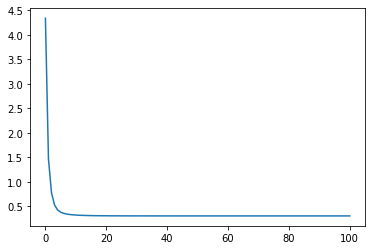

In [30]:
plt.plot(cost_list)

In [31]:
predict = model(X_one, w_final)
predict = df.demand.std()*predict + df.demand.mean()
predict

array([[-90.45300326],
       [-86.46551776],
       [-78.7978592 ],
       ...,
       [222.49271226],
       [237.21249867],
       [227.06234998]])

### MAE from scratch

In [32]:
mae = np.mean(abs(y - predict))
mae

demand    106.182789
dtype: float64

### R2 from scratch

In [33]:
def R2_score(predict,y):
    error = predict-y
    error_2 = np.dot(error.transpose(), error) #returns a Dot product of two arrays x and y
    y_mean = y.mean()
    var = y-y_mean
    var_2 = np.dot(var.transpose(), var)
    return 1 - error_2/var_2

In [34]:
R2_score(predict,y)

array([[0.38628944]])

## II) Implementation of the closed form solution (normal equation) 

In [35]:
def nequation(X,y):
    X_T_X=X.transpose().dot(X)
    w_normal= np.linalg.inv(X_T_X).dot (X.transpose()).dot(y) #calculating inverse
    return w_normal

In [36]:
w_normal = nequation(X,y)
w_normal

array([[ 1.97678368e+01],
       [ 1.04963854e+02],
       [ 2.05010992e+00],
       [ 7.61896950e+00],
       [-2.67727417e+01],
       [ 3.71592815e+00],
       [-3.97614053e+00],
       [ 2.80195746e+02],
       [-2.02633992e+02],
       [ 2.40357778e+01],
       [-7.45671039e-01],
       [-6.76471705e-02]])

In [37]:
predict = X @ w_normal #multiplication de matrices
predict

,0
0,-80.536090
1,-76.494696
2,-68.875726
3,-45.521142
4,-37.902173
...,...
17374,195.419676
17375,203.038645
17376,214.566108
17377,229.571767


## III) Scikit Learn library

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  #permet de normaliser les donnéees

scaler = MinMaxScaler()

df[['season', 'yr', 'mnth','hr','holiday', 'workingday', 'weathersit','temp','hum','windspeed','days']] = scaler.fit_transform(df[['season', 'yr', 'mnth','hr','holiday', 'workingday', 'weathersit','temp','hum','windspeed','days']]) 

model = LinearRegression()

X = df[['season', 'yr', 'mnth','hr','holiday', 'workingday', 'weathersit','temp','hum','windspeed','days']]
y = df['demand']
model.fit(X, y)  #linear regression : normalization + cost funtion + gradient descent
model.score(X, y) #qualité de prédiction du modèle 

0.38742287018379096

In [39]:
print(model.coef_)
print(model.intercept_)  

[  60.11847976  130.04919173   45.01550434  177.16888107  -25.18352079
    3.93279102  -11.45754432  277.20257667 -196.88406946   25.30676817
  -97.50968256]
13.682011851194034


In [40]:
prediction = model.predict(X)
prediction

print(prediction)

[-83.56493454 -79.55029446 -71.84729963 ... 211.57326092 226.26214825
 216.24557683]


## IV) Display meanAbsoluteError and r2 for each model

### R2

In [41]:
from sklearn.metrics import r2_score

prediction = model.predict(X)
r2_score(y, prediction)

0.38742287018379096

### MAE

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE : " + str(mean_absolute_error(y, prediction)))
print("RMSE : "  + str(mean_squared_error(y, prediction, squared=False))) #"squared=false" pour obtenir le RMSE et non pas le MSE

MAE : 106.09815773937387
RMSE : 141.96310399286935


## V) Improve any of the models by tuning the different hyperparameters

We will improve from scratch model

In [43]:
learning_rate2 = 0.7 # faut trouver le learning rate le plus grand avant que ca diverge
#plus alpha est grand plus la courbe se rapproche de 0, mieux c'est

nb_iterations2 = 1000

In this part, we change the value of differents hyperparameters as learning rate (=alpha) and number of iterations to see if the value of R2 improve. However, with different tests, R2 remains the same. So, we let the default parameters.

## Average real demand versus the average predicted demand and the standard deviation of both by grouping your data by

### hour

In [44]:
df['demand_pred'] = prediction

In [45]:
df_index_hour = df[['hr','demand']].groupby(['hr']).mean()
df_index_hour

,demand
hr,
0.000000,53.898072
0.043478,33.375691
0.086957,22.869930
0.130435,11.727403
0.173913,6.352941
0.217391,19.889819
0.260870,76.044138
0.304348,212.064649
0.347826,359.011004


In [46]:
df_index_hour2 = df[['hr','demand_pred']].groupby(['hr']).mean()
df_index_hour2

,demand_pred
hr,
0.000000,78.896650
0.043478,81.562620
0.086957,85.948241
0.130435,91.259685
0.173913,95.580627
0.217391,98.550829
0.260870,104.302517
0.304348,116.387094
0.347826,134.567946


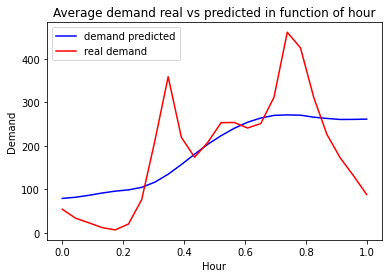

In [47]:
ax=plt.subplot(111)
plt.plot(df_index_hour2, c= "blue", label='demand predicted')
plt.plot(df_index_hour, c= "red", label='real demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.legend()
plt.title("Average demand real vs predicted in function of hour")

plt.show()

In [48]:
df_ind_hour = df[['hr','demand']].groupby(['hr']).std()
df_ind_hour

,demand
hr,
0.000000,42.307910
0.043478,33.538727
0.086957,26.578642
0.130435,13.239190
0.173913,4.143818
0.217391,13.200765
0.260870,55.084348
0.304348,161.441936
0.347826,235.189285


In [49]:
df_ind_hour2 = df[['hr','demand_pred']].groupby(['hr']).std()
df_ind_hour2

,demand_pred
hr,
0.000000,77.787689
0.043478,76.717044
0.086957,75.362400
0.130435,73.120110
0.173913,72.127638
0.217391,73.043176
0.260870,73.850561
0.304348,76.971716
0.347826,81.659834


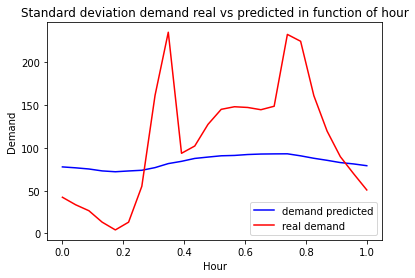

In [50]:
ax=plt.subplot(111)
plt.plot(df_ind_hour2, c= "blue", label='demand predicted')
plt.plot(df_ind_hour, c= "red", label='real demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.legend()
plt.title("Standard deviation demand real vs predicted in function of hour")

plt.show()

### season

In [51]:
df_index_season = df[['season','demand']].groupby(['season']).mean()
df_index_season

,demand
season,
0.000000,111.114569
0.333333,208.344069
0.666667,236.016237
1.000000,198.868856


In [52]:
df_index_season2 = df[['season','demand_pred']].groupby(['season']).mean()
df_index_season2

,demand_pred
season,
0.000000,114.198927
0.333333,193.094097
0.666667,257.195665
1.000000,189.164360


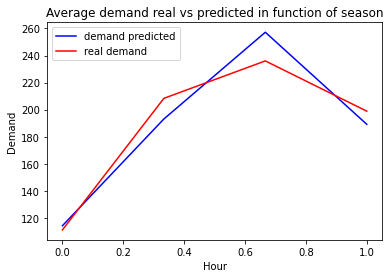

In [53]:
ax=plt.subplot(111)
plt.plot(df_index_season2, c= "blue", label='demand predicted')
plt.plot(df_index_season, c= "red", label='real demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.legend()
plt.title("Average demand real vs predicted in function of season")

plt.show()

In [54]:
df_ind_season = df[['season','demand']].groupby(['season']).std()
df_ind_season

,demand
season,
0.000000,119.224010
0.333333,188.362473
0.666667,197.711630
1.000000,182.967972


In [55]:
df_ind_season2 = df[['season','demand_pred']].groupby(['season']).std()
df_ind_season2

,demand_pred
season,
0.000000,98.664082
0.333333,107.565452
0.666667,100.959142
1.000000,95.634102


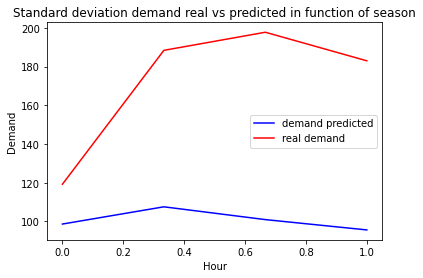

In [56]:
ax=plt.subplot(111)
plt.plot(df_ind_season2, c= "blue", label='demand predicted')
plt.plot(df_ind_season, c= "red", label='real demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.legend()
plt.title("Standard deviation demand real vs predicted in function of season")

plt.show()

### We try to do with the temperature

In [57]:
df_index_temp = df[['temp','demand']].groupby(['temp']).mean()
df_index_temp

,demand
temp,
0.000000,41.882353
0.020408,35.625000
0.040816,42.000000
0.061224,28.235294
0.081633,49.294118
0.102041,58.421053
0.122449,55.108696
0.142857,65.578261
0.163265,60.116129


In [58]:
df_index_temp2 = df[['temp','demand_pred']].groupby(['temp']).mean()
df_index_temp2

,demand_pred
temp,
0.000000,2.812879
0.020408,-21.213196
0.040816,44.327404
0.061224,33.168691
0.081633,32.570196
0.102041,43.642515
0.122449,37.823740
0.142857,41.549117
0.163265,52.106948


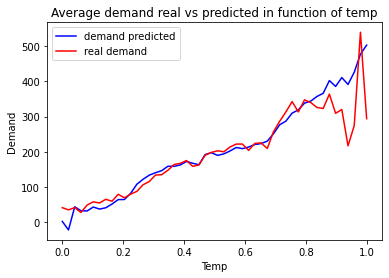

In [60]:
ax=plt.subplot(111)
plt.plot(df_index_temp2, c= "blue", label='demand predicted')
plt.plot(df_index_temp, c= "red", label='real demand')
plt.xlabel('Temp')
plt.ylabel('Demand')
plt.legend()
plt.title("Average demand real vs predicted in function of temp")

plt.show()

In [61]:
df_ind_temp = df[['temp','demand']].groupby(['temp']).std()
df_ind_temp

,demand
temp,
0.000000,80.875585
0.020408,57.779898
0.040816,30.583220
0.061224,27.019737
0.081633,74.691979
0.102041,70.434700
0.122449,61.825713
0.142857,73.083074
0.163265,65.678967


In [62]:
df_ind_temp2 = df[['temp','demand_pred']].groupby(['temp']).std()
df_ind_temp2

,demand_pred
temp,
0.000000,57.865096
0.020408,55.661674
0.040816,66.423151
0.061224,68.854542
0.081633,73.445804
0.102041,80.246055
0.122449,86.152839
0.142857,76.890325
0.163265,73.982596


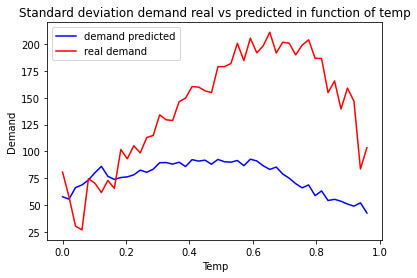

In [63]:
ax=plt.subplot(111)
plt.plot(df_ind_temp2, c= "blue", label='demand predicted')
plt.plot(df_ind_temp, c= "red", label='real demand')
plt.xlabel('Temp')
plt.ylabel('Demand')
plt.legend()
plt.title("Standard deviation demand real vs predicted in function of temp")

plt.show()

## Add dummy variables/Do feature engineering to improve the accuracy of the selected model 


We have added variables to avoid an order level of our categorical variables.

In [64]:
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand,demand_pred
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.224490,0.81,0.0,Sat,0.0,16,-83.564935
1,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.204082,0.80,0.0,Sat,0.0,40,-79.550294
2,0.0,0.0,0.0,0.086957,0.0,0.0,0.0,0.204082,0.80,0.0,Sat,0.0,32,-71.847300
3,0.0,0.0,0.0,0.130435,0.0,0.0,0.0,0.224490,0.75,0.0,Sat,0.0,13,-48.642906
4,0.0,0.0,0.0,0.173913,0.0,0.0,0.0,0.224490,0.75,0.0,Sat,0.0,1,-40.939911


In [65]:
df.dayOfWeek = df.dayOfWeek.astype("category").cat.codes #conversion objet en int

In [66]:
df = pd.get_dummies(df,columns = ['season','yr', 'hr','mnth','weathersit','dayOfWeek'])

In [67]:
df.head()

,holiday,workingday,temp,hum,windspeed,days,demand,demand_pred,season_0.0,season_0.3333333333333333,...,weathersit_0.3333333333333333,weathersit_0.6666666666666667,weathersit_1.0,dayOfWeek_0,dayOfWeek_1,dayOfWeek_2,dayOfWeek_3,dayOfWeek_4,dayOfWeek_5,dayOfWeek_6
0,0.0,0.0,0.224490,0.81,0.0,0.0,16,-83.564935,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.204082,0.80,0.0,0.0,40,-79.550294,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.204082,0.80,0.0,0.0,32,-71.847300,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0.224490,0.75,0.0,0.0,13,-48.642906,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.224490,0.75,0.0,0.0,1,-40.939911,1,0,...,0,0,0,0,0,1,0,0,0,0


We transform the dataframe into a vector :


In [68]:
X_dum = df.drop(columns=['demand', 'temp', 'hum', 'windspeed']).to_numpy()
y_dum = df[['demand']].to_numpy()

In [69]:
X_normalized_dum = z_score(X_dum)
X_normalized_dum

array([[-0.1721122 , -1.46689994, -1.72965981, ..., -0.40712398,
        -0.40539376, -0.40750804],
       [-0.1721122 , -1.46689994, -1.72965981, ..., -0.40712398,
        -0.40539376, -0.40750804],
       [-0.1721122 , -1.46689994, -1.72965981, ..., -0.40712398,
        -0.40539376, -0.40750804],
       ...,
       [-0.1721122 ,  0.68170976,  1.73384496, ..., -0.40712398,
        -0.40539376, -0.40750804],
       [-0.1721122 ,  0.68170976,  1.73384496, ..., -0.40712398,
        -0.40539376, -0.40750804],
       [-0.1721122 ,  0.68170976,  1.73384496, ..., -0.40712398,
        -0.40539376, -0.40750804]])

In [70]:
X_alreadyNorm = df[['temp', 'hum', 'windspeed']]

We bring together the values ​​that we have just normalized with those that already were.


In [71]:
X_norm_tot = np.concatenate((X_normalized_dum, X_alreadyNorm), axis=1)

In [72]:
#on normalise y grâce à la fct z_score
y_normalized = z_score(y_dum)

In [73]:
X_one_normTot = np.append(np.ones((X_norm_tot.shape[0],1), dtype=float), X_norm_tot, axis =1)
X_one_normTot

array([[ 1.        , -0.1721122 , -1.46689994, ...,  0.2244898 ,
         0.81      ,  0.        ],
       [ 1.        , -0.1721122 , -1.46689994, ...,  0.20408163,
         0.8       ,  0.        ],
       [ 1.        , -0.1721122 , -1.46689994, ...,  0.20408163,
         0.8       ,  0.        ],
       ...,
       [ 1.        , -0.1721122 ,  0.68170976, ...,  0.24489796,
         0.6       ,  0.19301751],
       [ 1.        , -0.1721122 ,  0.68170976, ...,  0.24489796,
         0.56      ,  0.15786999],
       [ 1.        , -0.1721122 ,  0.68170976, ...,  0.24489796,
         0.65      ,  0.15786999]])

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_one_normTot,y_normalized, test_size=0.3, random_state=32)
print("training test :", X_train.shape,y_train.shape)
print("testing test :", X_test.shape,y_test.shape)

training test : (12165, 61) (12165, 1)
testing test : (5214, 61) (5214, 1)


In [75]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("train score :", train_score)
print("test score :", test_score)

train score : 0.6865674371100542
test score : 0.6835112438442783


In [76]:
# w : vector of weights of the model
n = X_norm_tot.shape[1] #nb de colonnes de X
w = np.random.randn(n+1,1) 
m = X_train.shape[0]

In [77]:
def model(X_train, w):
    return X_train.dot (w) # w ca correspond à b  donc ax+b 

In [78]:
w

array([[-0.84630612],
       [ 0.81867867],
       [-1.47250225],
       [-1.73884471],
       [-0.92872579],
       [ 0.57839598],
       [ 1.1734018 ],
       [-0.82652538],
       [ 0.3335896 ],
       [-0.6394536 ],
       [ 0.43367844],
       [-0.73890143],
       [-0.18204292],
       [ 1.08126975],
       [-0.04721768],
       [ 0.10657212],
       [ 0.00577032],
       [-1.2716156 ],
       [-0.12227434],
       [-0.90147657],
       [-2.3885464 ],
       [ 0.7429703 ],
       [-1.27539753],
       [-0.15914344],
       [-0.51753236],
       [ 1.73000855],
       [ 0.1016049 ],
       [ 0.90131379],
       [-0.05276976],
       [-1.25821479],
       [ 0.59713218],
       [ 1.07467753],
       [ 0.67575657],
       [-0.95506857],
       [-0.19733971],
       [ 0.1149183 ],
       [-0.57224452],
       [ 1.26175319],
       [ 0.27841758],
       [ 2.56776904],
       [ 1.69813745],
       [-2.0697532 ],
       [ 2.42457637],
       [-0.54547301],
       [ 0.90567379],
       [-0

In [79]:
def cost_function (w, X_train, y_train) :
    m = X_train.shape[0]
    return 1/(2*m)* np.sum((model(X_train,w)-y_train)**2)

In [80]:
Cost= cost_function (w, X_one_normTot, y_normalized)
Cost

39.54682467375779

In [81]:
def grad(w, X_train, y_train):
    m = X_train.shape[0]
    return 1/m * X_train.T.dot(model(X_train,w)-y_train)

In [82]:
learning_rate = 0.5 # faut trouver le learning rate le plus grand avant que ca diverge
#plus alpha est grand plus la courbe se rapproche de 0, mieux c'est

nb_iterations = 100 # qd ce nb est trop grand, ca prend du temps à compiler

In [83]:
def gradient_descent(X_train, y_train, w, learning_rate,nb_iterations): #algo itératif
    cost_list = [] #répertorier tous les cost à chaque iteration
    cost_list.append(cost_function(w, X_train, y_train))
    for i in range (0, nb_iterations):
        w = w-learning_rate * grad (w, X_train, y_train)
        cost_list.append(cost_function(w, X_train, y_train))
    return w, cost_list

In [84]:
w_final, cost_list = gradient_descent(X_one_normTot, y_normalized, w, learning_rate, nb_iterations)
w_final

array([[-0.1091684 ],
       [ 0.05619189],
       [ 0.16130448],
       [-1.28157287],
       [ 0.52727907],
       [ 0.29062591],
       [ 0.33267439],
       [ 0.28804375],
       [ 0.33670762],
       [-0.68617086],
       [ 0.48039569],
       [-0.18557892],
       [-0.21213278],
       [-0.22834171],
       [-0.2444674 ],
       [-0.25558618],
       [-0.24765663],
       [-0.19126069],
       [-0.04898165],
       [ 0.09992543],
       [-0.06888962],
       [-0.13502146],
       [-0.11266394],
       [-0.0752395 ],
       [-0.08708134],
       [-0.11110429],
       [-0.10761876],
       [-0.0464216 ],
       [ 0.11573509],
       [ 0.07240812],
       [-0.05574115],
       [-0.15167599],
       [-0.21427263],
       [-0.26275677],
       [-0.31336638],
       [ 0.24005515],
       [ 0.29065955],
       [ 0.37968698],
       [ 0.42667129],
       [ 0.51529454],
       [ 0.54139418],
       [ 0.57304702],
       [ 0.65020766],
       [ 0.72383729],
       [ 0.74092339],
       [ 0

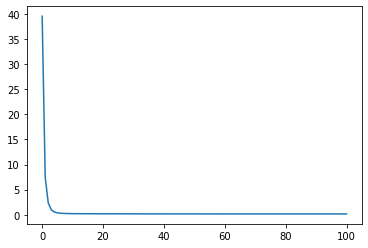

In [85]:
plt.plot(cost_list)

In [86]:
predict = model(X_one_normTot, w_final)
predict = df.demand.std()*predict + df.demand.mean()
predict

array([[-62.51391505],
       [-83.24231202],
       [-92.67540168],
       ...,
       [106.87611211],
       [ 73.46946109],
       [ 27.32740588]])

In [87]:
def R2_score(predict,y):
    error = predict-y
    error_2 = np.dot(error.transpose(), error)
    y_mean = y.mean()
    var = y-y_mean
    var_2 = np.dot(var.transpose(), var)
    return 1 - error_2/var_2

In [88]:
R2_score(predict,y_dum)

array([[0.68274475]])


After doing the feature engineering, our model increased its performance by about 30 %